# Lab \#5: Linear Regression

### **The steps of using a machine learning model:**

1. Load in the data
2. Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)
3. Perform a test, train split to create a testing dataset and a training dataset.
4. Import an ML algorithm
5. Initialise the model
6. Fit the model on the training set
7. Draw a visualisation (if applicable to the model)
8. Test the model on the test set and evaluate the performance
9. Use your Model

## Part 1: Practice Together
---

### **Step \#0: Import the following before continuing**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

### **Step \#1: Load the data**
---

The following dataset contains information on Boston housing and contains 13 numerical features and a numerical target.

* CRIM: Per capita crime rate by town
* ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built prior to 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per 10,000 dolalrs
* PTRATIO: Pupil-teacher ratio by town
* B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
* LSTAT: Percentage of lower status of the population
* **TARGET** (target that needs to be added): Median value of owner-occupied homes in $1000s. *You need to add this column after loading the boston data from sklearn datasets*.


**NOTE:** The Boston housing prices dataset has a noted ethical problem: the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices. This variable is likely due to the practice of ['Redlining'](https://www.wgbh.org/news/local-news/2019/11/12/how-a-long-ago-map-created-racial-boundaries-that-still-define-boston) from the 1930s to 1970s in Boston, which has had long lasting affects in Boston still present today. The goal of the research that led to the creation of this dataset was to study the impact of air quality, but it did not give adequate demonstration of the validity of this assumption. Please know this data set is used for *practice only* and can serve as a good example of why ethical standards are so important for ML models and implementation. [Read more](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8) on problems existing within this data set and why it is not used for anything other than practicing ML.

Use the following to help load your new data:
```
boston = datasets.load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target
df
```

In [ ]:
boston = datasets.load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target
df

NameError: ignored

### **Part \#2: Decide independent and dependent variables**
---
##### *Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)*


We are going to use "Rooms per dwelling" (`RM`)and "Percentage of lower status of the population" (`LSTAT`) as our dependent variables for predicting `TARGET`. Our target is the median value of owner-occupied homes. **With these values, we are building a housing value predictor for Boston in the 1970s.**

In [ ]:
df[["RM","LSTAT", "TARGET"]]

,RM,LSTAT,TARGET
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


### **Part #2.1: Visualize the variables you'll be using**
---
Create two graphs. One with `LSTAT` and the target, and another with `RM` and the target.

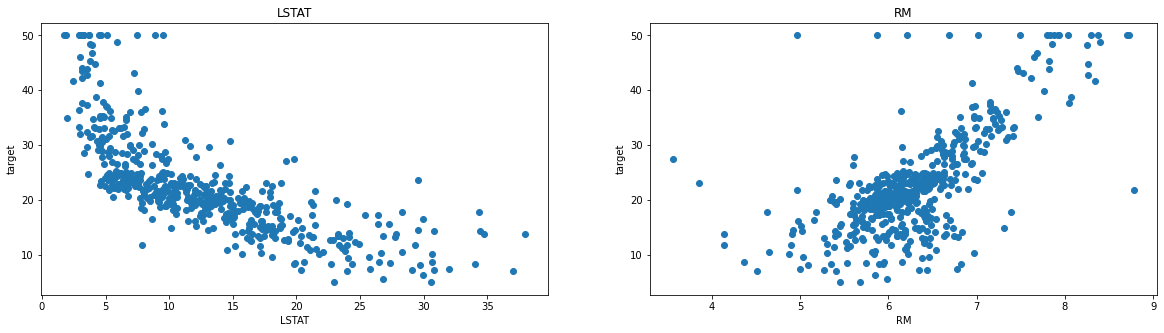

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['TARGET']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('target')

### **Part \#3: Split data into training and testing data**
---


In [ ]:
#X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["RM", "LSTAT"]], df[["TARGET"]], test_size = 0.2, random_state=42)


X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["RM", "LSTAT"]], df[["TARGET"]], test_size=0.2, random_state=42)

### **Step \#4: Import an ML algorithm (Using Sklearn algorithms)**
---


In [ ]:
# import that LinearRegression algorithm
from sklearn.linear_model import LinearRegression

### **Step \#5: Initialize your model**
---

In [ ]:
# initialize
reg = LinearRegression()

### **Step \#6: Fit your model and make a prediction**
---

In [ ]:
# fit
reg.fit(X_train, y_train)
# predict
pred = reg.predict(X_test)

### **Step \#7: Visualize Data and Linear Regeression**
---
Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be:
```
plt.plot([0, 50], [0, 50], '--k', label="Correct prediction")
```

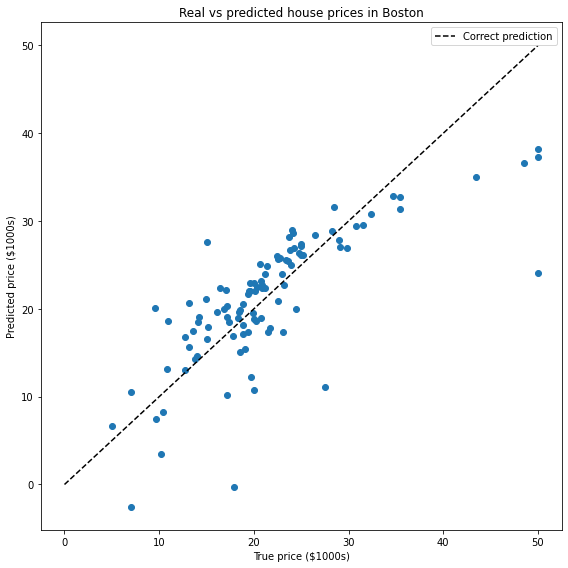

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred)
plt.plot([0, 50], [0, 50], '--k', label="Correct prediction")
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title("Real vs predicted house prices in Boston")
plt.legend()
plt.tight_layout()

### **Step \#8: Use the following code to test the accuracy of your model**
---

In [ ]:
from sklearn.metrics import mean_squared_error
print('mean squared: ', mean_squared_error(y_test, pred))

mean squared:  31.243290601783627


### **Step \#9: Use the model**
---
Using the model we created, predict the price of two houses in Boston.

House 1:  7 `RM` and `LSTAT` is 5.0%

House 2:  6 `RM` and `LSTAT` is 4.0%

Note, you must create a dataframe containing with the information of the new houses:

```python
new_houses = pd.DataFrame(enter_new_house_data_here, columns =["RM", "LSTAT"])
```

This `new_houses` variable can then be placed directly into the `model.predict()` function!

In [ ]:
new_houses = pd.DataFrame([[7,5], [6,4]], columns =["RM", "LSTAT"])
new_prediction = reg.predict(new_houses)
print('prediction: ', new_prediction)

prediction:  [[31.25202152]
 [26.41942131]]


## Part 2: Independent Work
---

This dataset contains data from diabetic patients and features such as their BMI, age , blood pressure and glucose levels that are useful in predicting the diabetes disease progression in patients. We will be looking at these variables that will be used to help predict disease progression in diabetic patients.

### **Step \#1: Load the Diabetes dataset from sklearn**
---

The following code will load the data. Turn this into a date frame.
```python
diabetes = datasets.load_diabetes()
```
Add a column called `TARGET` with the target data (`diabetes.target`).  In this case, the target is a measure for disease progression.

In [ ]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['TARGET'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


### **Step \#2: Decide independent and dependent variables**
---
##### *Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)*

Here we would like to use the `"age"` `"bmi"` and `"bp"` columns as our dependent variables and the `Target` as our independent variable.

We are building a predictor of disease progression.


In [ ]:
df[["age","bmi", "bp", "TARGET"]]

,age,bmi,bp,TARGET
0,0.038076,0.061696,0.021872,151.0
1,-0.001882,-0.051474,-0.026328,75.0
2,0.085299,0.044451,-0.005671,141.0
3,-0.089063,-0.011595,-0.036656,206.0
4,0.005383,-0.036385,0.021872,135.0
...,...,...,...,...
437,0.041708,0.019662,0.059744,178.0
438,-0.005515,-0.015906,-0.067642,104.0
439,0.041708,-0.015906,0.017282,132.0
440,-0.045472,0.039062,0.001215,220.0


### **Step \#3: Split the data into train and test data**
---
Use `age`, `bmi`, and `bp` for our independent variables.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["age", "bmi", "bp"]], df[["TARGET"]], test_size=0.2, random_state=42)

### **Step \#4: Import your model**
---


In [ ]:
from sklearn.linear_model import LinearRegression

### **Step \#5: Initialize your model**
---

In [ ]:
reg = LinearRegression()

### **Step \#6: Fit your model and make a prediction**
---

In [ ]:
# fit
reg.fit(X_train, y_train)
# predict
pred = reg.predict(X_test)

### **Step \#7: Visualize Data and Linear Regeression**
---
Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be.
```
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
```

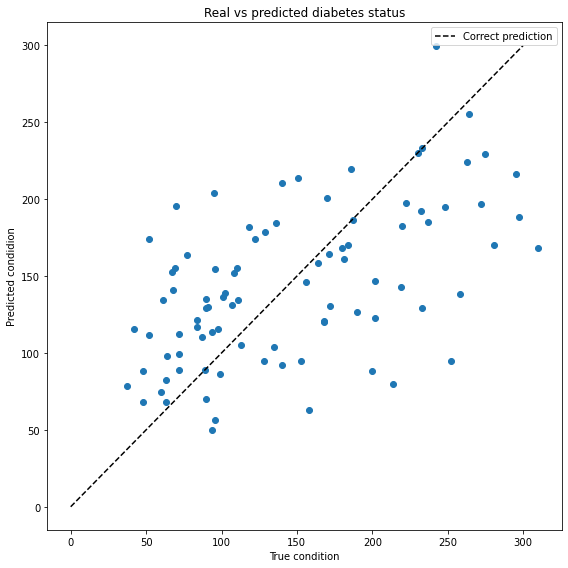

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred)
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
plt.axis('tight')
plt.xlabel('True condition')
plt.ylabel('Predicted condidion')
plt.title("Real vs predicted diabetes status")
plt.legend()
plt.tight_layout()

### **Step \#8 (Given code): Use the following code to test the accuracy of your model**
---

In [ ]:
from sklearn.metrics import mean_squared_error
print('mean squared: ', mean_squared_error(y_test, pred))

mean squared:  3756.852737441201


### **Step \#9: Use the model**
---
Using the model we created, predict the disease progression of two new patients.

Patient 1:  0.0045 `age` 0.053 `bmi` 0.014 `bp`

Patient 2:  0.0039 `age` -0.012 `bmi` 0.018 `bp`

Note, you must create a dataframe containing with the information of the new patients:

```python
new_patient_data = pd.DataFrame(new_patient_data_here, columns =["age", "bmi", "bp"])
```

In [ ]:
new_progression = pd.DataFrame([[0.0045,0.053,0.014], [0.0039,-0.012,0.018]], columns =["age", "bmi", "bp"])
new_prediction = reg.predict(new_progression)
print('prediction: ', new_prediction)

prediction:  [[201.6217164 ]
 [148.76638393]]


## Part 3:  Additional Practice
---

**In this problem, please complete all of the following steps:**

1. Load the California Hosuing data set from sklearn (code provided)
2. Decide independent and dependent variables (look at the data's target)
3. Split the data into training and testing data (You can use all columns except the target for the independent variables for now).
4. Import your model
5. Initialize your model
6. Fit your model and make a prediction
7. Visualize your prediction versus actual data
8. Use a method of your choice to calculate accuracy.
9. Use the model to explore different feature values and create predictions.
10. Rather than use all of the columns, play around with differebnt combinations to find a potentially better model.

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people)

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). We will use the data o help make a model that will predict the meidan house value for California in 1990.

**Predict the median house value of a district that has: 7.2 average rooms 1.5 average bedrooms, 51 years old, located at 38.1 Lat, -121.08 Lon**

Use the following code:

```python
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
cali_data = fetch_california_housing()
df = pd.DataFrame(data=cali_data.data, columns=cali_data.feature_names)
df['TARGET'] = cali_data.target
```

---
Copyright, The Coding School 2022